# importing libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#  loading the dataset

In [4]:
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [6]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal_name  101 non-null    int64
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  class_type   101 non-null    int64
dtypes: int64(18)
memory usage: 14.3 KB


In [8]:
X = df.drop(['predator'], axis=1)

In [9]:
X

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,1,0,0,1,0,0,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,1,0,0,1,0,0,1,1,1,0,0,2,1,0,1,1
97,98,1,0,1,0,1,0,0,0,1,1,0,6,0,0,0,6
98,99,1,0,0,1,0,0,1,1,1,0,0,4,1,0,1,1
99,100,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
y = df['predator']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
normalize = StandardScaler()
normalize.fit(X)
X = normalize.transform(X)

In [13]:
X

array([[-1.71498585,  1.16139451, -0.49690399, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-1.68068613,  1.16139451, -0.49690399, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-1.64638642, -0.86103386, -0.49690399, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.64638642,  1.16139451, -0.49690399, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.68068613, -0.86103386, -0.49690399, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [ 1.71498585, -0.86103386,  2.01246118, ..., -0.38435306,
        -0.87859537, -0.39750205]])

# train test split

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.svm import SVC

my_model = SVC(kernel='linear')
my_model.fit(X_train, y_train)


SVC(kernel='linear')

In [17]:
y_pred = my_model.predict(X_test)

In [18]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is = ", accuracy)

Accuracy score is =  0.8571428571428571


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(y_test, y_pred))

[[ 5  3]
 [ 0 13]]


<AxesSubplot:>

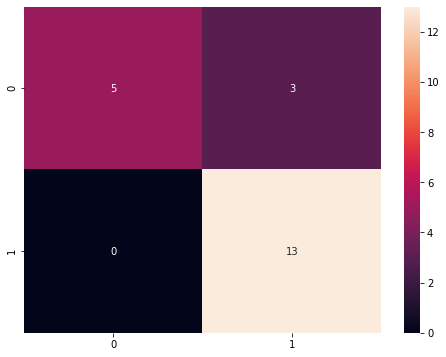

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)